# Todo sobre la D. Binomial

En un experimento binomial se cumplen las siguientes condiciones:

1. El experimento consta de una secuencia de n ensayos identicos.
2. En cada ensayo hay dos resultados posibles, uno llamado exito y otro fracaso.
3. La probabilidad de exito es constante de un ensayo a otro, y se denota por $p$.
4. La probabilidad de fracaso sera $1 - p$
5. Los ensayos son independientes. El resultado de cualquiera de ellos no influye en el resultado de cualquier otro

La distribución binomial se caracteriza por la probabilidad de éxito en cada ensayo, el número total de ensayos y el interés en contar cuántos éxitos ocurren en una serie de ensayos independientes

La formula de la distribucion binomial es la siguiente:

$$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de exito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = numero de eventos estudiados

$k$ = numero de eventos deseados que tengan exito


La expresion dentro del parentesis es el resultado de una combinacion y se refiere al numero de formas de escoger $k$ de los $n$ eventos para que sean eventos exitosos. Viene dada por la siguiente formula:

 $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$
 
 Donde:
 
 $n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$
 
 $k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$
 
 Por definición:

 $0! = 1$

## Metodos de stats a utilizar


- **Metodo pmf (Probability Mass Function):** aplica sobre variables discretas y proporciona la probabilidad de que una variable aleatoria discreta tome un valor especifico.

- **Metodo cdf (Cumulative Distribution Function):** aplica tanto a variables discretas como continuas. Proporciona la probabilidad de que una variable aleatoria tome un valor menor o igual a un valor especifico.

- **Metodo ppf (Percent Point Function):** conocida como funcion de cuantiles, es la inversa de la distribucion acumulada cdf. Dada una probabilidad, esta funcion proporciona el valor $x$ tal que la probabilidad de que la variable sea menor o igual a $x$ es igual a $q$

Veamos graficamente, cada uno de estos metodos:

In [57]:
# librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

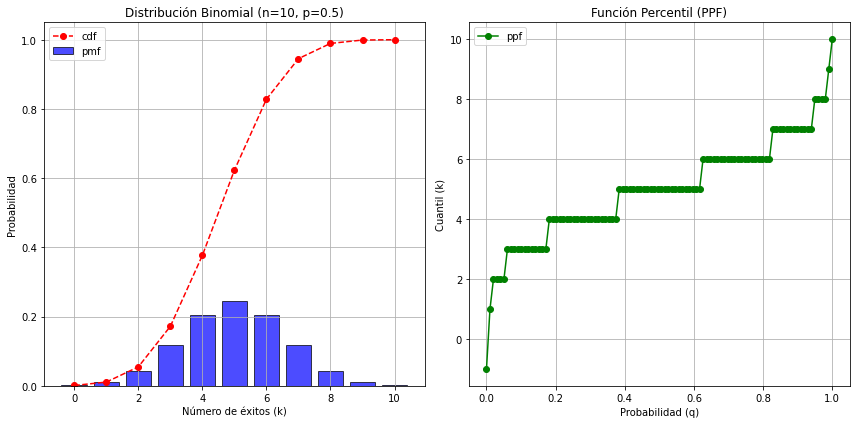

In [58]:
# parametros de las D. binomial
# numero de eventos estudiados
n = 10
# probabilidad de exito de cada evento
p = 0.5
# probabilidad de fracaso
q = 1 - p

# generamos los posibles valores de k (numero deseado de exito)
k = np.arange(0, n+1)

# calcular pmf y cdf
pmf = binom.pmf(k, n, p)
cdf = binom.cdf(k, n, p)

# crear grafico de barra para pmf y cdf
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(k , pmf, alpha=0.7, color='blue', edgecolor='black', label='pmf')
plt.plot(k, cdf, 'r--', marker='o', label= 'cdf')
plt.xlabel('Número de éxitos (k)')
plt.ylabel('Probabilidad')
plt.title(f'Distribución Binomial (n={n}, p={p})')
plt.legend()
plt.grid(True)

# Generar valores para la ppf
q_values = np.linspace(0, 1, 100)
ppf = binom.ppf(q_values, n, p)

# crear grafico ppf
plt.subplot(1,2,2)
plt.plot(q_values, ppf, 'g-', marker='o', label='ppf')
plt.xlabel('Probabilidad (q)')
plt.ylabel('Cuantil (k)')
plt.title('Función Percentil (PPF)')
plt.legend()
plt.grid(True)

plt.tight_layout();

## Ejemplo 1
Se lanza una moneda cuatro veces. Calcular la probabilidad de que salgan mas caras que cruces

### Solucion de forma manual

In [59]:
# probabilidad que salga cara
p = 0.5

# probabilidad que salga cruz
q = 1 - p

# numero de eventos estudiados
n = 4

Como estamos interesados en conocer la probabilidad de que salgan más caras que cruces, los eventos donde esto ocurre es cuando, o salen tres caras y una cruz, o salen cuatro caras y cero cruces, por lo que:

$$P(X \geq 3)= P(X = 3) + P(X = 4)$$

In [60]:
# libreria para calcular combinaciones
from scipy.special import comb

**Calcular probabilidad que salgan 3 caras**

In [61]:
# numero de eventos deseados
k_3 = 3

# calculo de las combinaciones
combinaciones = comb(n, k_3)
combinaciones

4.0

In [62]:
# probabilidad que salgan 3 caras
P_3 = combinaciones*(p**k_3)*(q**(n - k_3))
P_3

0.25

**Calcular probabilidad que salgan 4 caras**

In [63]:
# numero de eventos deseados
k_4 = 4

# calculo de las combinaciones
combinaciones = comb(n, k_4)
combinaciones

1.0

In [64]:
# probabilidad que salgan 4 caras
P_4 = combinaciones*(p**k_4)*(q**(n - k_4))
P_4

0.0625

**Probabilidad que salgan mas de dos caras**

In [65]:
P = P_3 + P_4
P

0.3125

### Solucion con Python

In [66]:
# libreria para calcular probabilidad 
from scipy.stats import binom

Vamos a calcular cada una de las probabilidades con la funcion binom y luego sumarlas. 

In [67]:
# numero de eventos estudiados
n = 4

# probabilidad que salga cara
p = 0.5

# numero de eventos deseados
k_3 = 3

P_3 = binom.pmf(k_3, n, p)
P_3

0.25000000000000006

In [68]:
# numero de eventos deseados
k_4 = 4

P_4 = binom.pmf(k_4, n, p)
P_4

0.0625

In [69]:
# suma de las probabilidades
P = P_3 + P_4
P

0.31250000000000006

In [70]:
# otra alternativa
P = binom.pmf([3,4], n, p).sum()
P

0.31250000000000006

## Ejemplo 2
Un agente de seguros vende pólizas a cinco personas de la misma edad y que disfrutan de buena salud. Según las tablas actuales, la probabilidad de que una persona en estas condiciones viva 30 años o más es 2/3. Hállese la probabilidad de que, transcurridos 30 años, vivan:

a. Las cinco personas

b. Al menos tres personas

c. Exctamente dos personas

### Solucion a (Forma manual)

In [71]:
# extraemos valores

# probabilidad de vivir mas de 30
p = 2/3

# probabilidad de no vivir mas de 30
q = 1 - p

# numero de eventos estudiados
n = 5

# numero de eventos deseados
k = 5

In [72]:
# calculo de las combinaciones
combinaciones = comb(5, 5)
combinaciones

1.0

In [73]:
# calculo de la probabilidad
proba = combinaciones*(p**k)*(q**(n-k))
proba = proba.round(3)
proba

0.132

In [74]:
# calculo de la probabilidad con python
proba = binom.pmf(5, n, p)
proba

0.13168724279835387

### Solucion b
Para este caso, debemos considerar las probabilidad de cada evento mayor o igual a 3 personas
$$P(X \geq 3) = P(X=3) + P(X=4) + P(X=5) $$

La probabilidad para 5 personas ya ha sido calculado en $a$. Ahora calculamos para 3 y 4 personas

**Para 3 personas**

In [75]:
# numero de eventos deseados
k_3 = 3

In [76]:
# calculo de las combinaciones
combinaciones = comb(5, k_3)
combinaciones

10.0

In [77]:
# calculo de la probabilidad para 3 personas
proba_3 = combinaciones*(p**k_3)*(q**(n-k_3))
proba_3 = proba_3.round(3)
proba_3

0.329

**Para 4 personas**

In [78]:
# numero de eventos deseados
k_4 = 4

# calculo de las combinaciones
combinaciones = comb(5, k_4)

# calculo de la probabilidad para 3 personas
proba_4 = combinaciones*(p**k_4)*(q**(n-k_4))
proba_4 = proba_4.round(3)
proba_4

0.329

**Probabilidad que al menos vivan 3 personas**

In [79]:
prob = proba_3 + proba_4 + 0.132
prob

0.79

**Forma directa**

In [80]:
binom.pmf([3,4,5], n, p).sum()

0.7901234567901232

### Solucion c
Calculamos la probabiilidad que vivan exactamente 2 personas

In [81]:
binom.pmf(2, n, p).sum()

0.16460905349794244

## Ejemplo 3
 Si de seis a siete de la tarde se admite que un número de teléfono de cada cinco está comunicando, ¿cuál es la probabilidad de que, cuando se marquen 10 números de teléfono elegidos al azar, sólo comuniquen dos?


In [82]:
# extraemos valores
# probabilidad de comunicacion
p = 1/5

# probabilidad de no comunicacion
q = 1 - p

# numero de eventos estudiados
n = 10

# numero de eventos deseados
k = 2

**Calculo directo con Python**

In [83]:
binom.pmf(2, n, p)

0.30198988800000004

## Ejemplo 4
Crea una distribucion binomial con probabilidad de exito de 0.5 y numero de ensayos de 10

In [84]:
# librerias a utlizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [85]:
# definimos parametros de la distribucion
# numero de eventos
n = 10

# probabilidad de exito
p = 0.2

# generar los valores posibles de k (numero de exito)
k = np.arange(0, n+1)

# calcular la funcion de masa de probabilidad (pmf)
pmf = binom.pmf(k, n, p)

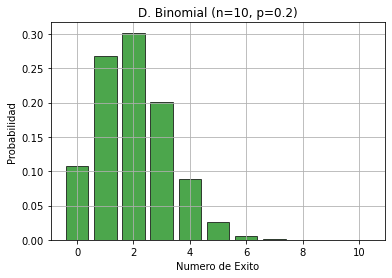

In [86]:
# crear el grafico de barra
plt.bar(k, pmf, alpha=0.7, color='green', edgecolor='black') #stem crea una funcion de tallo
plt.xlabel('Numero de Exito')
plt.ylabel('Probabilidad')
plt.title(f'D. Binomial (n={n}, p={p})')
plt.grid(True); # agrega cuadrilla al grafico

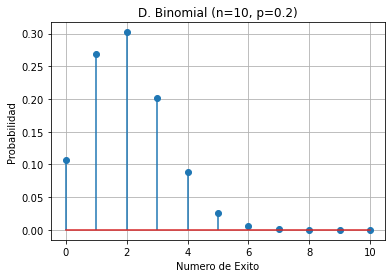

In [87]:
# crear el grafico de tallo
plt.stem(k, pmf, use_line_collection=True) #stem crea una funcion de tallo
plt.xlabel('Numero de Exito')
plt.ylabel('Probabilidad')
plt.title(f'D. Binomial (n={n}, p={p})')
plt.grid(True); # agrega cuadrilla al grafico

# La Media y la Varianza en la D. Binomial

Para n = 1, la D. binomial llega a ser la D. de Bernoulli. La media de una variable de Bernoulli es $\mu = p$, asi que el numero esperado de los casos de exito en cualquier evento unico es $p$. Como un experimento binomial se compone de $n$ eventos la intuicion sugiere que la media en una D. binomial viene dada por el producto del numero de eventos y la probabilidad de exito en un solo evento

$$\mu = np$$

Por su parte, la varianza de una D. binomial viene dada por:

$$\sigma = \sqrt(npq)$$

## Ejemplo 5
Si 75% de todas las compras en una tienda se hacen con tarjeta de credito y $k$ es el numero entre 10 compras seleccionadas al azar realizadas con tarjeta de credito, calcular la media y la varianza de la distribucion.

In [88]:
# extreamos las variables
# numero de eventos
n = 10
# probabilidad de exito
p = 0.75
# probabilidad de fracaso
q = 1 - p

In [89]:
# calular la media
media = n*p
media

7.5

In [90]:
# calcular la varianza
std = np.sqrt(n*p*q)
std

1.3693063937629153

Crea la grafica para esta distribucion binomial

In [91]:
# generar los valores posibles de k (numero de exito)
k = np.arange(0, n+1)

# calcular la funcion de masa de probabilidad (pmf)
pmf = binom.pmf(k, n, p)

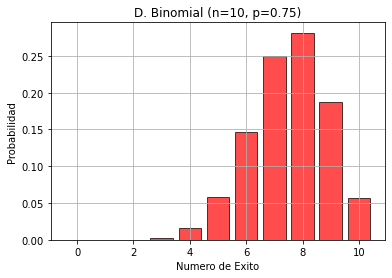

In [92]:
# crear el grafico de barra
plt.bar(k, pmf, alpha=0.7, color='red', edgecolor='black') #stem crea una funcion de tallo
plt.xlabel('Numero de Exito')
plt.ylabel('Probabilidad')
plt.title(f'D. Binomial (n={n}, p={p})')
plt.grid(True); # agrega cuadrilla al grafico

## Ejemplo 6
En una urna hay 30 bolas, 10 rojas y el resto blancas. Se elige una bola al azar y se anota si es roja; el proceso se repite, devolviendo la bola, 10 veces. Calcular la media y la desviación típica

In [93]:
# obtenemos los parametros 
# numero de eventos estudiados
n = 10
# probabilidad de exito
p = 10/30
# probabilidad de fracaso
q = 1 - p

In [94]:
# calculo de la media
media = n*p
media

3.333333333333333

In [95]:
# calculo de la desaviacion estandar
std = np.sqrt(n*p*q)
std

1.4907119849998598

## Ejemplo 7
En unas pruebas de alcoholemia se ha observado que el 5% de los conductores controlados dan positivo en la prueba y que el 10% de los conductores controlados no llevan puesto el cinturón de seguridad. También se ha observado que las dos infracciones son independientes. Un guardia de tráfico para cinco conductores al azar. Si tenemos en cuenta que el número de conductores es suficientemente importante como para estimar que la proporción de infractores no varía al hacer la selección.

a.- Determinar la probabilidad de que exactamente tres conductores hayan cometido alguna de las dos infracciones.

b.- Determine la probabilidad de que al menos uno de los conductores controlados haya cometido alguna de las dos infracciones.

### Solucion a (Forma manual)

Consideremos lo siguiente: 
- Los conductores dan positivo a la prueba de alcoholemia
- Los conductores no llevan puesto el cinturon de seguridad
- La probabilidad de que el conductor de positivo a la prueba o de que no lleve su cinturon de seguridad o de que ambos eventos ocurran sabiendo que las infracciones son independientes es:
$$P(A\cup B) = P(A) + P(B) - P(A)\cdot P(B)$$

In [96]:
# probabilidad de dar positivo a la prueba de alcoholemia
p_a = 0.05

# probabilidad de no llevar el cinturon uesto
p_c = 0.10

# calculamos la probabilidad de obtener una infraccion por parte del fiscal
p_inf = p_a + p_c - p_a*p_c
p_inf

0.14500000000000002

In [97]:
# parametros de la distribucion binomial

# probabilidad de exito
p = p_inf

# probabilidad de fracaso
q = 1 - p

# numero de eventos estudiados
n = 5

# numero de eventos deseados con exito
k = 3


Determinar la probabilidad de que exactamente tres conductores hayan cometido alguna de las dos infracciones

In [98]:
# calcular las combinaciones
combinaciones = comb(n, k)
combinaciones

10.0

In [99]:
# calculo de la probabilidad
p_3 = combinaciones*(p**k)*(q**(n-k))
p_3

0.022286210906250006

- Existe una probabilidad del 2.2% de que de los 5 conductores seleccionados al azar, 3 cometan alguna de las infracciones o ambas.

### Solucion  b (con Python)

In [102]:
# probabilidad de que al menos uno de los conductores haya cometido alguna infraccion
p_1 = binom.pmf([1,2,3,4,5], n, p_inf).sum()
p_1

0.543090094215625

- La proboabilidad de que al menos uno de los 5 conductores haya cometido alguna de las infracciones es de 54.3%